In [3]:
from google.colab import files
import pandas as pd

# --- 1️⃣ Annual CO₂ Emission file ---
# Assuming the file has already been uploaded, read directly
uploaded = files.upload() # Add this line to prompt for file upload
df_co2 = pd.read_csv("annual carbon emission data.csv")
print("✅ CO2 file loaded:", df_co2.shape)

Saving annual carbon emission data.csv to annual carbon emission data.csv
✅ CO2 file loaded: (1386, 4)


In [4]:
from google.colab import files
import pandas as pd
# --- 2️⃣ Population file ---
uploaded = files.upload()          # choose population.csv
df_pop = pd.read_csv("population.csv")
print("✅ Population file loaded:", df_pop.shape)

Saving population.csv to population.csv
✅ Population file loaded: (18944, 3)


In [5]:
from google.colab import files
import pandas as pd
# --- 3️⃣ Energy use per person file ---
uploaded = files.upload()          # choose energy-use-per-person.csv
df_energy = pd.read_csv("energy-use-per-person.csv")
print("✅ Energy file loaded:", df_energy.shape)

Saving energy-use-per-person.csv to energy-use-per-person.csv
✅ Energy file loaded: (11086, 3)


In [6]:
from google.colab import files
import pandas as pd
# --- 4️⃣ Fertilizer vs GDP file ---
uploaded = files.upload()          # choose fertilizer-consumption-per-hectare-vs-gdp-per-capita.csv
df_fert = pd.read_csv("fertilizer-consumption-per-hectare-vs-gdp-per-capita.csv")
print("✅ Fertilizer file loaded:", df_fert.shape)

Saving fertilizer-consumption-per-hectare-vs-gdp-per-capita.csv to fertilizer-consumption-per-hectare-vs-gdp-per-capita.csv
✅ Fertilizer file loaded: (13920, 6)


In [7]:
# Rename common columns for consistency
df_co2 = df_co2.rename(columns={'Entity': 'Country', 'Year': 'Year', df_co2.columns[-1]: 'CO2_Emissions'})
df_pop = df_pop.rename(columns={'Entity': 'Country', 'Year': 'Year', df_pop.columns[-1]: 'Population'})
df_energy = df_energy.rename(columns={'Entity': 'Country', 'Year': 'Year', df_energy.columns[-1]: 'Energy_Use_per_person'})
df_fert = df_fert.rename(columns={'Entity': 'Country', 'Year': 'Year', df_fert.columns[-1]: 'Fertilizer_vs_GDP'})

print("✅ Columns standardized successfully!")

✅ Columns standardized successfully!


In [8]:
# Merge step-by-step on Country and Year
merged = df_co2.merge(df_pop, on=['Country','Year'], how='left')
merged = merged.merge(df_energy, on=['Country','Year'], how='left')
merged = merged.merge(df_fert, on=['Country','Year'], how='left')

print("✅ Merged dataset shape:", merged.shape)
merged.head()

✅ Merged dataset shape: (1386, 10)


,Country,Code_x,Year,CO2_Emissions,Population,Energy_Use_per_person,Code_y,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare,"GDP per capita, PPP (constant 2021 international $)",Fertilizer_vs_GDP
0,Brazil,BRA,1856,227193.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,BRA,1857,269048.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,BRA,1858,284547.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,1859,372714.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,BRA,1860,434898.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert numeric columns and fill missing values
for col in ['Population', 'Energy_Use_per_person', 'Fertilizer_vs_GDP', 'CO2_Emissions']:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

merged = merged.dropna(subset=['CO2_Emissions'])
merged.fillna(merged.median(numeric_only=True), inplace=True)

print("✅ Data cleaned successfully!")
print("Shape after cleaning:", merged.shape)
merged.head()

✅ Data cleaned successfully!
Shape after cleaning: (1386, 10)


,Country,Code_x,Year,CO2_Emissions,Population,Energy_Use_per_person,Code_y,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare,"GDP per capita, PPP (constant 2021 international $)",Fertilizer_vs_GDP
0,Brazil,BRA,1856,227193.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN
1,Brazil,BRA,1857,269048.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN
2,Brazil,BRA,1858,284547.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN
3,Brazil,BRA,1859,372714.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN
4,Brazil,BRA,1860,434898.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN


✅ EDA Started...

Dataset Shape: (1386, 13)

Column Names: ['Country', 'Code_x', 'Year', 'CO2_Emissions', 'Population', 'Energy_Use_per_person', 'Code_y', 'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare', 'GDP per capita, PPP (constant 2021 international $)', 'Fertilizer_vs_GDP', 'Log_Population', 'Energy_Squared', 'CO2_Rolling_Avg']

Missing Values per Column:
 Country                                                                                                    0
Code_x                                                                                                     0
Year                                                                                                       0
CO2_Emissions                                                                                              0
Population                                                                                                 0
Energy_Use_per_person               

,Year,CO2_Emissions,Population,Energy_Use_per_person,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare,"GDP per capita, PPP (constant 2021 international $)",Fertilizer_vs_GDP,Log_Population,Energy_Squared,CO2_Rolling_Avg
count,1386.000000,1.386000e+03,1.386000e+03,1386.000000,1386.000000,1386.000000,0.0,1386.000000,1.386000e+03,1.386000e+03
mean,1918.200577,7.207983e+08,2.191524e+08,37927.878725,85.629358,40313.513162,NaN,18.847717,1.662705e+09,7.054072e+08
std,66.627822,1.546393e+09,2.767521e+08,14978.088175,31.672628,9500.766574,NaN,0.710877,1.353224e+09,1.511764e+09
min,1750.000000,2.271930e+05,4.188312e+07,1263.825200,1.380000,1666.927700,NaN,17.550394,1.597254e+06,2.271930e+05
25%,1868.000000,2.416988e+07,1.397207e+08,39086.637000,85.595000,41736.702000,NaN,18.755156,1.527765e+09,2.199698e+07
50%,1924.500000,1.851900e+08,1.397207e+08,39086.637000,85.595000,41736.702000,NaN,18.755156,1.527765e+09,1.770367e+08
75%,1974.000000,5.575047e+08,1.397207e+08,39086.637000,85.595000,41736.702000,NaN,18.755156,1.527765e+09,5.437913e+08
max,2023.000000,1.190250e+10,1.438070e+09,94845.180000,235.380000,74158.720000,NaN,21.086567,8.995608e+09,1.156698e+10


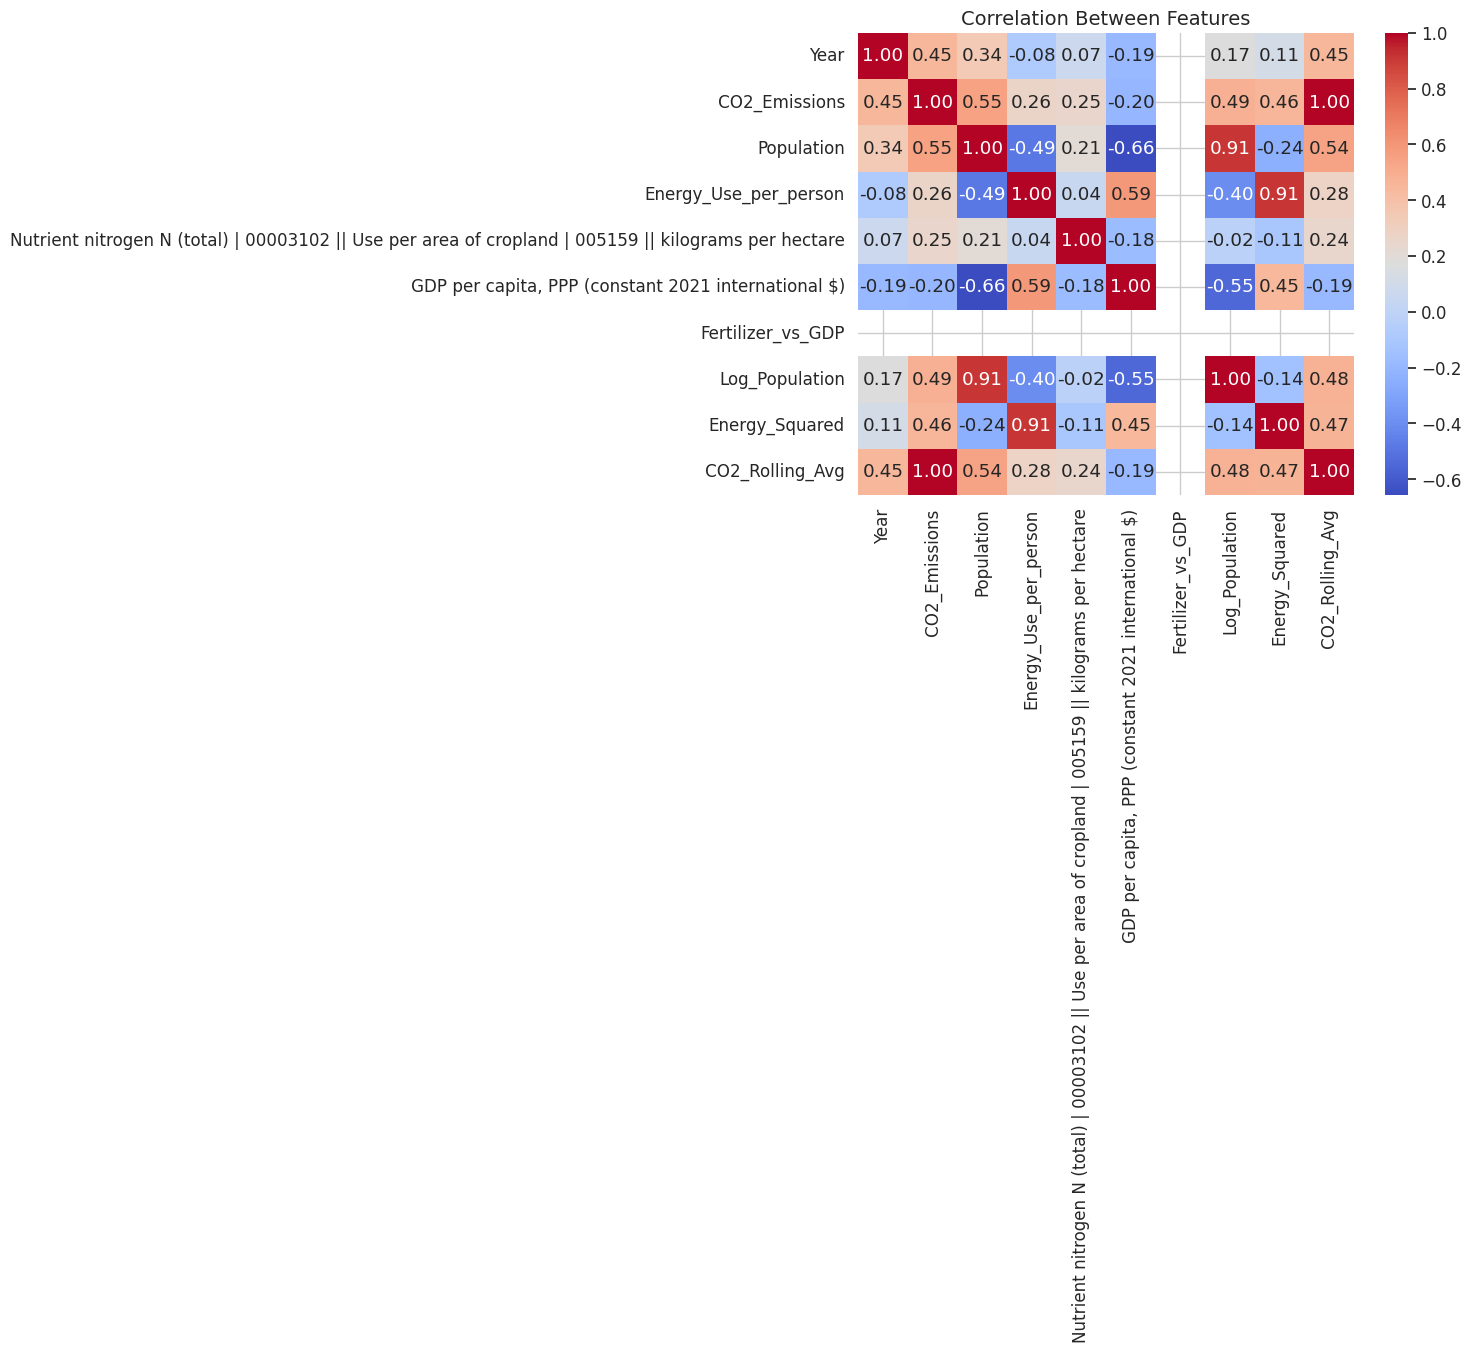

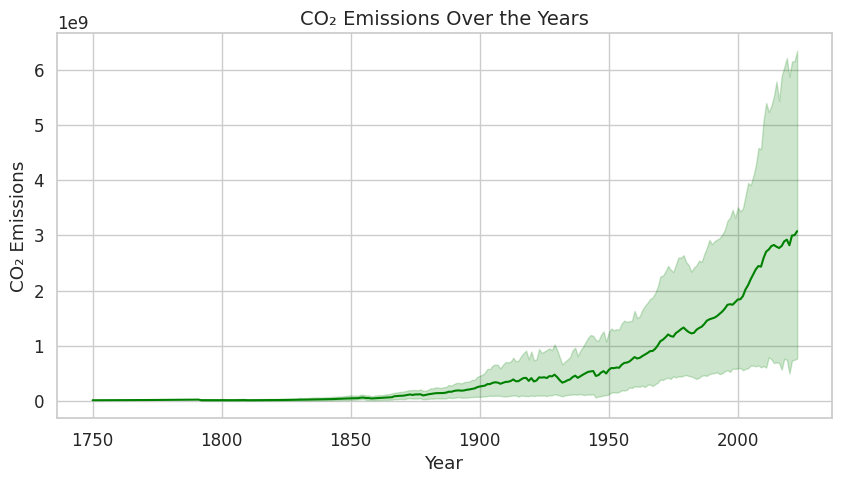

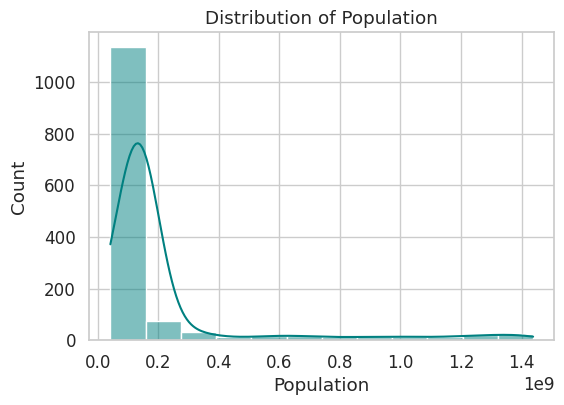

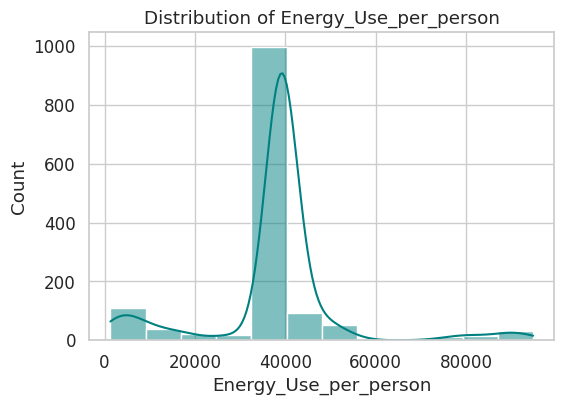

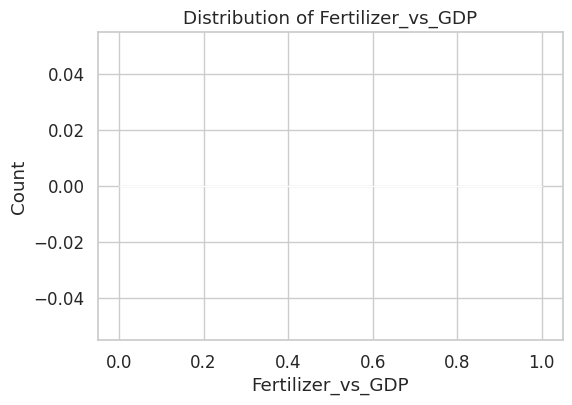

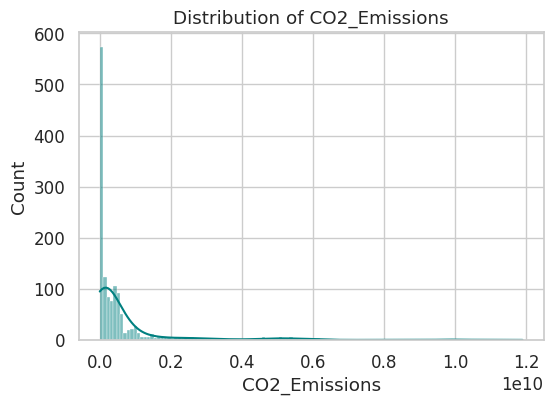

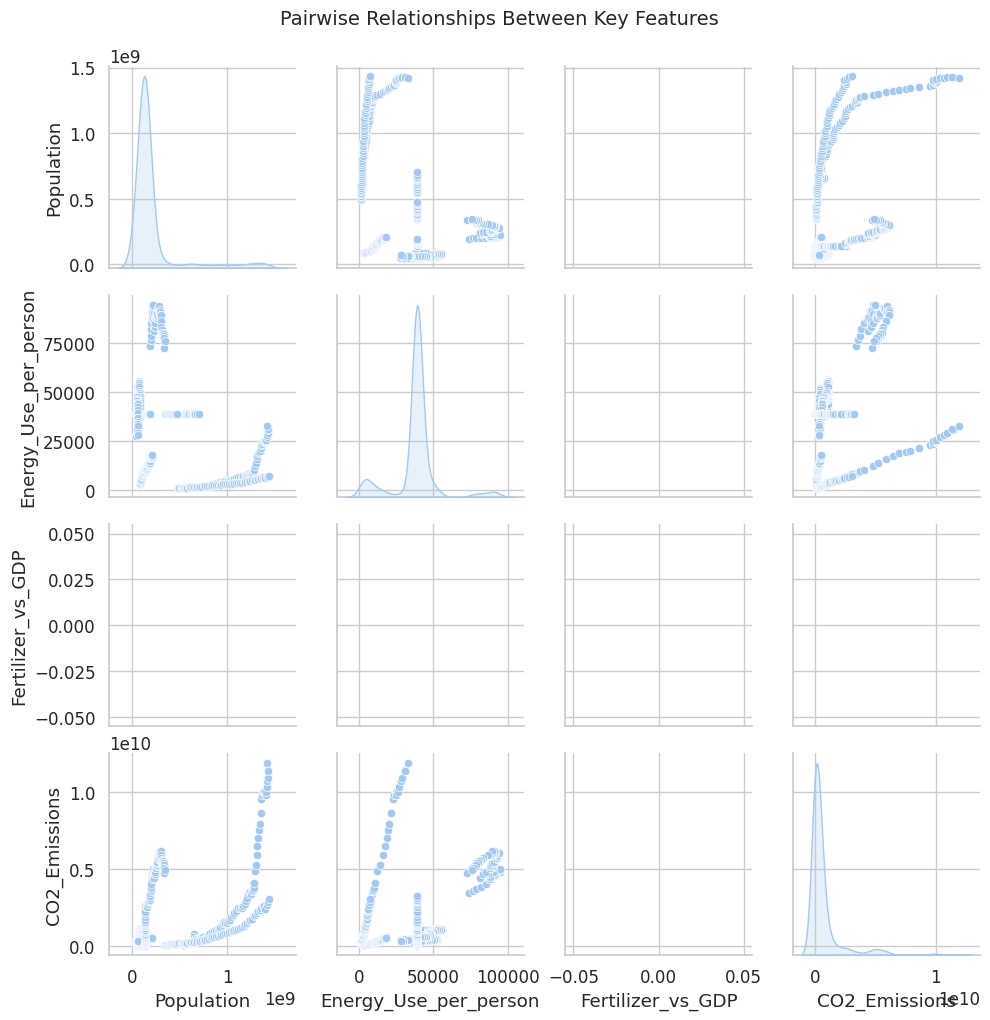

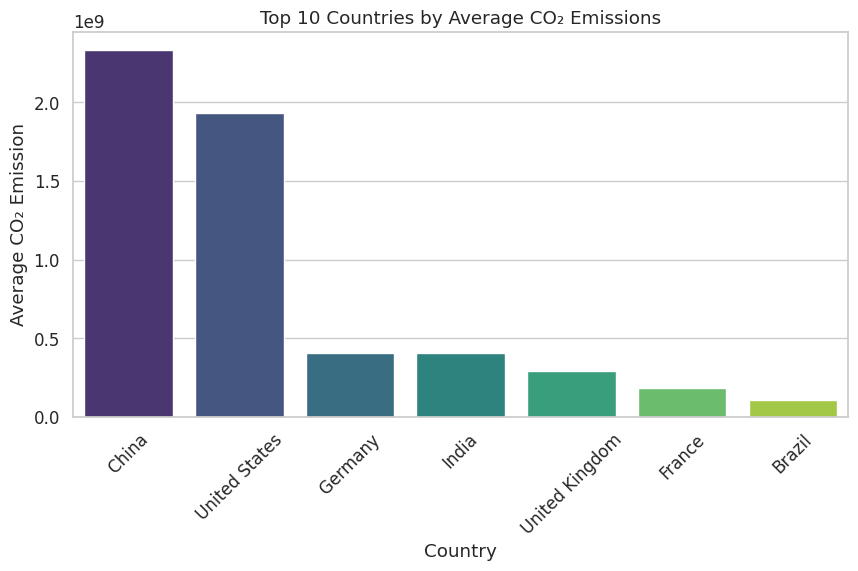

✅ EDA Completed Successfully!


In [16]:
# 🌿 Exploratory Data Analysis (EDA)
# ----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make plots look better
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

print("✅ EDA Started...\n")

# 1️⃣ Basic Information about Data
print("Dataset Shape:", merged.shape)
print("\nColumn Names:", merged.columns.tolist())
print("\nMissing Values per Column:\n", merged.isnull().sum())
print("\nData Types:\n", merged.dtypes)

# 2️⃣ Basic Statistical Summary
display(merged.describe())

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features", fontsize=14)
plt.show()

# 4️⃣ Trend of CO₂ Emissions over Years
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="CO2_Emissions", data=merged, color="green")
plt.title("CO₂ Emissions Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.grid(True)
plt.show()

# 5️⃣ Distribution of Each Major Feature
features = ['Population', 'Energy_Use_per_person', 'Fertilizer_vs_GDP', 'CO2_Emissions']

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(merged[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 6️⃣ Relationship between Important Features
sns.pairplot(merged[['Population', 'Energy_Use_per_person', 'Fertilizer_vs_GDP', 'CO2_Emissions']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02, fontsize=14)
plt.show()

# 7️⃣ Average CO₂ by Country (Optional - Top 10)
country_avg = merged.groupby('Country')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_avg.index, y=country_avg.values, palette="viridis", hue=country_avg.index, legend=False)
plt.title("Top 10 Countries by Average CO₂ Emissions")
plt.ylabel("Average CO₂ Emission")
plt.xticks(rotation=45)
plt.show()

print("✅ EDA Completed Successfully!")

In [17]:
# 🌿 Feature Engineering
print("✅ Starting Feature Engineering...")

# Log transform to reduce skew
merged['Log_Population'] = np.log1p(merged['Population'])

# Square energy use to capture non-linear effect
merged['Energy_Squared'] = merged['Energy_Use_per_person'] ** 2

# Rolling average of CO₂ for smoother trend (3-year window)
merged = merged.sort_values(['Country','Year'])
merged['CO2_Rolling_Avg'] = merged.groupby('Country')['CO2_Emissions'].transform(lambda x: x.rolling(3,1).mean())

# Fill remaining missing values
merged.fillna(merged.mean(numeric_only=True), inplace=True)

print("✅ Feature Engineering Completed!")
merged.head()

✅ Starting Feature Engineering...
✅ Feature Engineering Completed!


,Country,Code_x,Year,CO2_Emissions,Population,Energy_Use_per_person,Code_y,Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare,"GDP per capita, PPP (constant 2021 international $)",Fertilizer_vs_GDP,Log_Population,Energy_Squared,CO2_Rolling_Avg
0,Brazil,BRA,1856,227193.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN,18.755156,1.527765e+09,227193.000000
1,Brazil,BRA,1857,269048.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN,18.755156,1.527765e+09,248120.500000
2,Brazil,BRA,1858,284547.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN,18.755156,1.527765e+09,260262.666667
3,Brazil,BRA,1859,372714.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN,18.755156,1.527765e+09,308769.666667
4,Brazil,BRA,1860,434898.0,139720658.5,39086.637,NaN,85.595,41736.702,NaN,18.755156,1.527765e+09,364053.000000


In [25]:
# Select updated features
X = merged[['Year', 'Population', 'Energy_Use_per_person', 'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || kilograms per hectare', 'Log_Population', 'Energy_Squared', 'CO2_Rolling_Avg']]
y = merged['CO2_Emissions']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ MAE: {mae:.4f}")


✅ R² Score: 0.9531
✅ MAE: 170398183.3642


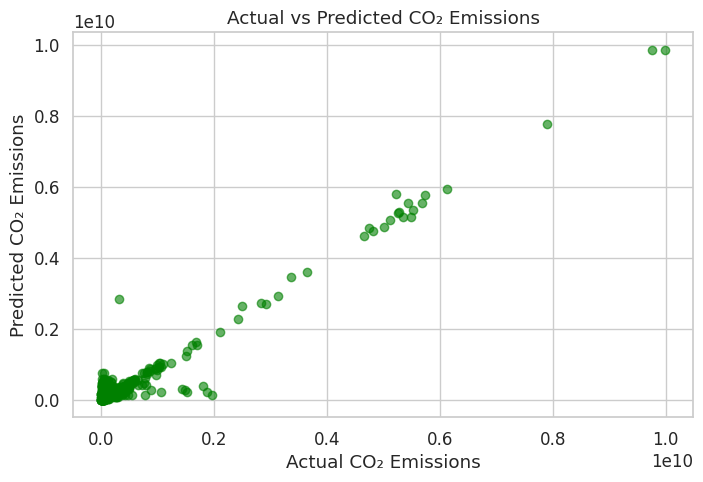

In [23]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True)
plt.show()


In [26]:
plt.savefig("results/Actual_vs_Predicted.png")


FileNotFoundError: [Errno 2] No such file or directory: 'results/Actual_vs_Predicted.png'

<Figure size 640x480 with 0 Axes>

In [27]:
import joblib
joblib.dump(model, "carbon_emission_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    objective='reg:squarederror'
)
xgb.fit(X_train_scaled, y_train)

# Evaluate
y_pred = xgb.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"R² Score: {r2:.4f}  → Accuracy = {r2*100:.2f}%")
print(f"MSE: {mse:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


✅ Model trained successfully!
R² Score: 0.9451  → Accuracy = 94.51%
MSE: 129627179587313168.0000


In [ ]:
import joblib

joblib.dump(xgb, "carbon_emission_model.pkl")
joblib.dump(scaler, "scaler.pkl")
merged.to_csv("final_carbon_emission_dataset.csv", index=False)

from google.colab import files
files.download("carbon_emission_model.pkl")
files.download("final_carbon_emission_dataset.csv")

print("✅ Files saved and ready for GitHub!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Files saved and ready for GitHub!


In [ ]:
!pip install gradio -q
import gradio as gr
import numpy as np
import joblib

model = joblib.load("carbon_emission_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict_emission(year, population, energy, fertilizer):
    X_new = np.array([[year, population, energy, fertilizer]])
    X_scaled = scaler.transform(X_new)
    pred = model.predict(X_scaled)[0]
    return f"Predicted CO₂ emissions for {int(year)}: {pred:,.2f} tonnes"

iface = gr.Interface(
    fn=predict_emission,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Population"),
        gr.Number(label="Energy use per person"),
        gr.Number(label="Fertilizer vs GDP"),
    ],
    outputs="text",
    title="CO₂ Emission Prediction Chatbot",
    description="Enter year, population, energy use, and fertilizer vs GDP to predict carbon emissions."
)
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5bf64f7f48edab880a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os
os.makedirs("results", exist_ok=True)


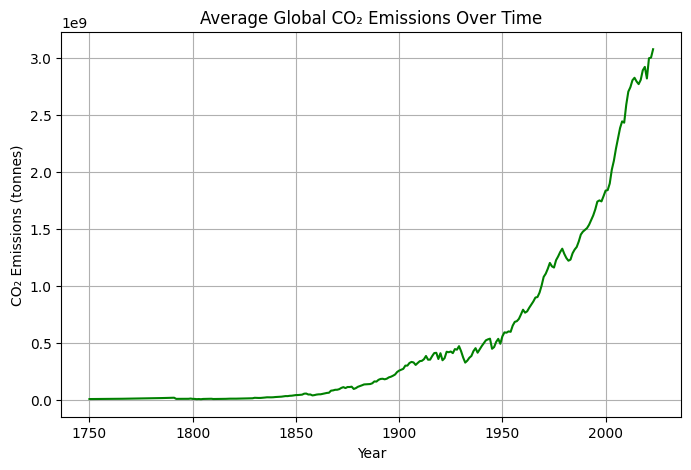

In [ ]:
import os
os.makedirs("results", exist_ok=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(merged.groupby('Year')['CO2_Emissions'].mean(), color='green')
plt.title("Average Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.grid(True)
plt.savefig("results/CO2_Emission_Trend.png")
plt.show()


In [ ]:
from google.colab import files
files.download("results/CO2_Emission_Trend.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

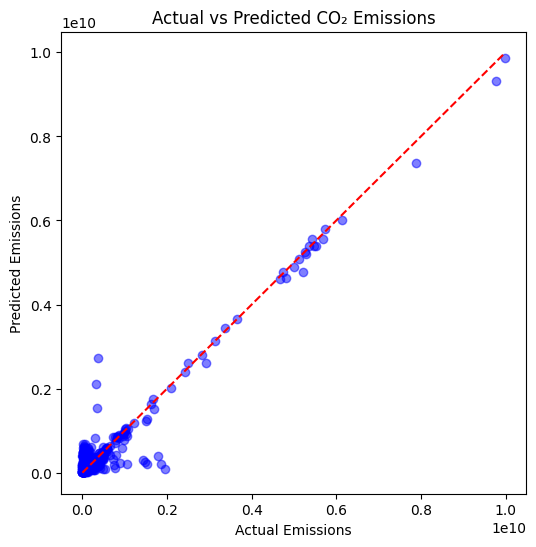

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.savefig("results/Actual_vs_Predicted.png")
plt.show()


In [ ]:
from google.colab import files
files.download("results/Actual_vs_Predicted.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

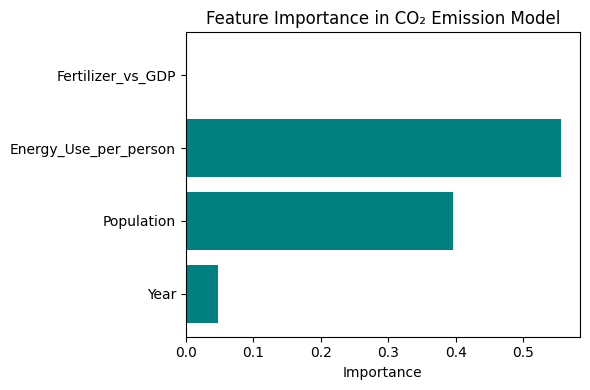

In [ ]:
import numpy as np

importance = xgb.feature_importances_
features = ['Year','Population','Energy_Use_per_person','Fertilizer_vs_GDP']

plt.figure(figsize=(6,4))
plt.barh(features, importance, color='teal')
plt.title("Feature Importance in CO₂ Emission Model")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("results/Feature_Importance.png")
plt.show()


In [ ]:
from google.colab import files
files.download("results/Feature_Importance.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a results folder (if not exists)
import os
os.makedirs("results", exist_ok=True)

# Save your model performance report
with open("results/accuracy_report.txt", "w") as f:
    f.write("Carbon Emission Prediction Model (Week 2)\n")
    f.write("----------------------------------------\n")
    f.write("Model Used: XGBoost Regressor\n")
    f.write(f"R² Score: {r2:.4f}\n")
    f.write(f"Accuracy: {r2*100:.2f}%\n")
    f.write(f"Mean Squared Error: {mse:.4f}\n")

print("✅ accuracy_report.txt created successfully!")


✅ accuracy_report.txt created successfully!


In [ ]:
from google.colab import files
files.download("results/accuracy_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    objective='reg:squarederror'
)
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"R² Score: {r2:.4f}  → Accuracy = {r2*100:.2f}%")
print(f"MSE: {mse:.4f}")


✅ Model trained successfully!
R² Score: 0.9451  → Accuracy = 94.51%
MSE: 129627179587313168.0000


In [ ]:
import os
os.makedirs("results", exist_ok=True)

with open("results/accuracy_report.txt", "w") as f:
    f.write("Carbon Emission Prediction Model (Week 2)\n")
    f.write("----------------------------------------\n")
    f.write("Model Used: XGBoost Regressor\n")
    f.write(f"R² Score: {r2:.4f}\n")
    f.write(f"Accuracy: {r2*100:.2f}%\n")
    f.write(f"Mean Squared Error: {mse:.4f}\n")

print("✅ accuracy_report.txt created successfully!")


✅ accuracy_report.txt created successfully!


In [ ]:
from google.colab import files
files.download("results/accuracy_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save trained model
joblib.dump(model, "carbon_emission_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [ ]:
# ✅ VERIFY THAT FILES EXIST AND DOWNLOAD THEM
import os
from google.colab import files

# Check files in workspace
print("\nSaved files in current directory:")
print(os.listdir())

# Download to your computer
files.download("carbon_emission_model.pkl")
files.download("scaler.pkl")



Saved files in current directory:
['.config', 'sample_data']


FileNotFoundError: Cannot find file: carbon_emission_model.pkl

In [ ]:
# 📊 Basic Info
merged.info()
merged.describe()

# 🔥 Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(merged.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 📈 CO₂ Emission Trend
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="CO2_Emissions", data=merged)
plt.title("CO₂ Emissions over Years")
plt.show()

NameError: name 'merged' is not defined